In [1]:
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt

In [2]:
from skimage.transform.ssim_optimize import maximize_ssim, minimize_ssim
from skimage.metrics._structural_similarity import structural_similarity as ssim

In [30]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float64") / 255.
x_test = x_test.astype("float64") / 255.

In [4]:
def add_noise(img, eps):
    with_noise = np.copy(img)
    noise = np.random.randint(0, 255, size = with_noise.shape) / 255.
    noise = noise * eps / np.linalg.norm(noise)
    with_noise = np.clip(with_noise + noise, 0, 1)
    return with_noise

In [42]:
eps = 8

old_img = np.copy(x_test[2])

noise_img = add_noise(old_img, eps)
max_img = maximize_ssim(old_img, eps, 50, 10)
min_img = minimize_ssim(old_img, eps, 50, 10)

In [43]:
img_list = [old_img, noise_img, max_img, min_img]

l2_list = [np.round(norm(old_img - i), 3) for i in img_list]

ssim_list = [np.round(ssim(old_img, i, multichannel=True), 3) for i in img_list]

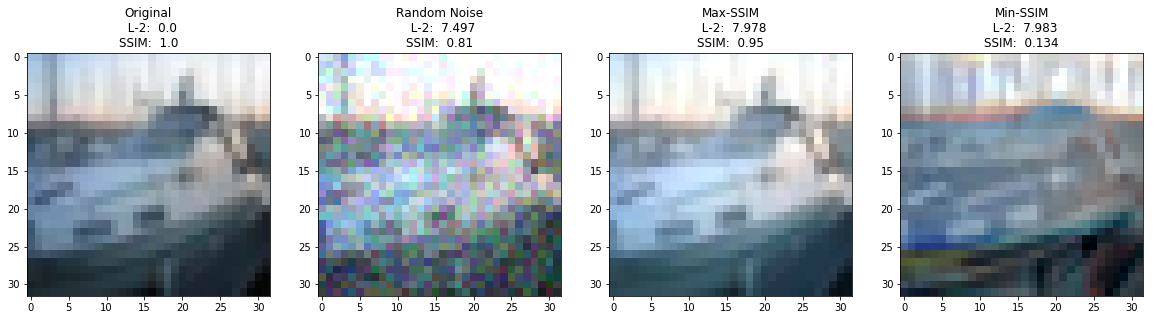

In [44]:
fig, axs = plt.subplots(1, 4, figsize=(20, 15))

axs[0].imshow(old_img)
axs[0].set_title("Original\n  L-2:  %s\nSSIM:  %s" % (l2_list[0], ssim_list[0]))

axs[1].imshow(noise_img)
axs[1].set_title("Random Noise\n  L-2:  %s\nSSIM:  %s" % (l2_list[1], ssim_list[1]))

axs[2].imshow(max_img)
axs[2].set_title("Max-SSIM\n  L-2:  %s\nSSIM:  %s" % (l2_list[2], ssim_list[2]))

axs[3].imshow(min_img)
axs[3].set_title("Min-SSIM\n  L-2:  %s\nSSIM:  %s" % (l2_list[3], ssim_list[3]))

plt.show()